# PCA (Principal Component Analysis) of ESG data

## Step 1: Install and import necessary libraries

In [ ]:
#!pip install missingno
#!pip install yellowbrick

In [242]:
import pandas as pd
import numpy as np
import missingno as msno

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from yellowbrick.features import PCA as YellowbrickPCA

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

## Step 2: Load your data

In [143]:
# Define the file path
file_path = './data/MSCI_ESG_AU_2018.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

### Check if there are any missing values

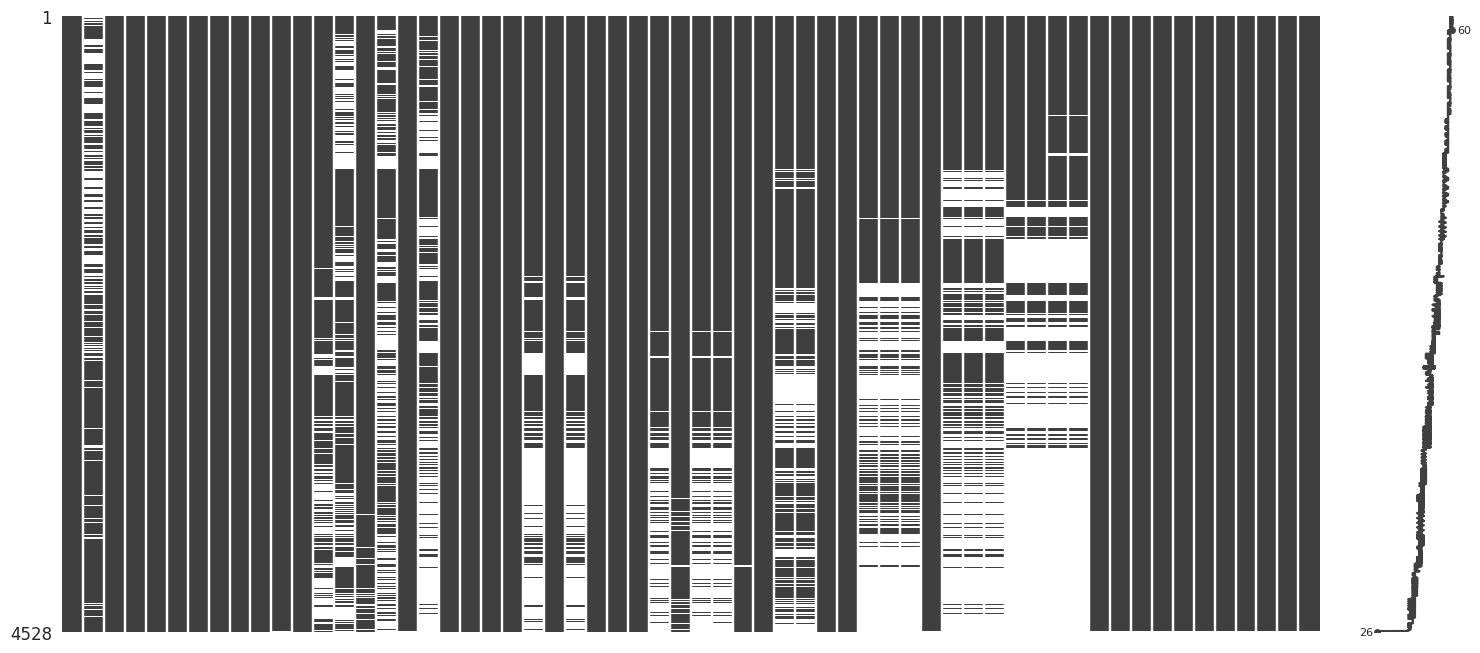

In [189]:
msno.matrix(df, figsize=(18, 8),fontsize=10)
plt.show()

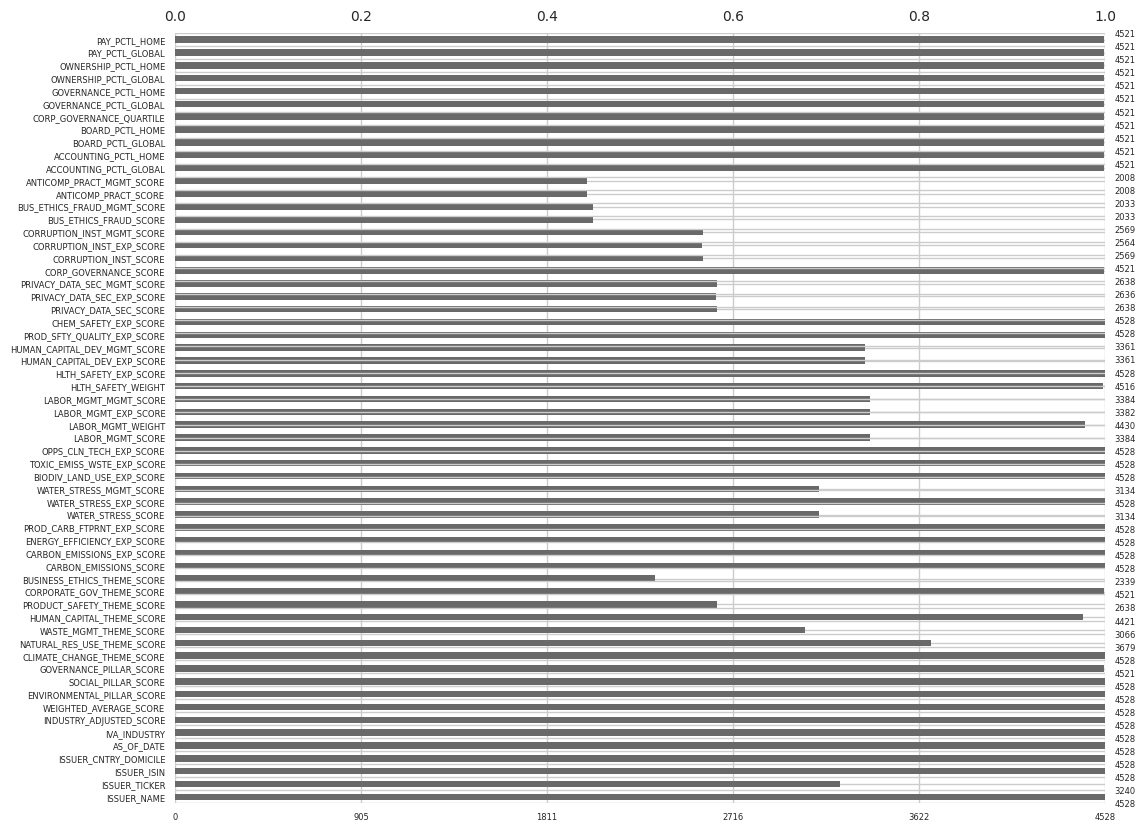

In [181]:
msno.bar(df,figsize=(12, 10),fontsize=6)
plt.show()

In [97]:
# Calculate the percentage of NaN in each column
nan_percentage = df.isna().mean() * 100
nan_percentage

ISSUER_NAME                      0.000000
ISSUER_TICKER                   28.445230
ISSUER_ISIN                      0.000000
ISSUER_CNTRY_DOMICILE            0.000000
AS_OF_DATE                       0.000000
IVA_INDUSTRY                     0.000000
INDUSTRY_ADJUSTED_SCORE          0.000000
WEIGHTED_AVERAGE_SCORE           0.000000
ENVIRONMENTAL_PILLAR_SCORE       0.000000
SOCIAL_PILLAR_SCORE              0.000000
GOVERNANCE_PILLAR_SCORE          0.154594
CLIMATE_CHANGE_THEME_SCORE       0.000000
NATURAL_RES_USE_THEME_SCORE     18.750000
WASTE_MGMT_THEME_SCORE          32.287986
HUMAN_CAPITAL_THEME_SCORE        2.363074
PRODUCT_SAFETY_THEME_SCORE      41.740283
CORPORATE_GOV_THEME_SCORE        0.154594
BUSINESS_ETHICS_THEME_SCORE     48.343640
CARBON_EMISSIONS_SCORE           0.000000
CARBON_EMISSIONS_EXP_SCORE       0.000000
ENERGY_EFFICIENCY_EXP_SCORE      0.000000
PROD_CARB_FTPRNT_EXP_SCORE       0.000000
WATER_STRESS_SCORE              30.786219
WATER_STRESS_EXP_SCORE           0

In [191]:
# Select the columns with the least amount of missing data (most non-missing data)
N=35
top_N_columns = nan_percentage.nsmallest(N).index
top_N_columns

Index(['ISSUER_NAME', 'ISSUER_ISIN', 'ISSUER_CNTRY_DOMICILE', 'AS_OF_DATE',
       'IVA_INDUSTRY', 'INDUSTRY_ADJUSTED_SCORE', 'WEIGHTED_AVERAGE_SCORE',
       'ENVIRONMENTAL_PILLAR_SCORE', 'SOCIAL_PILLAR_SCORE',
       'CLIMATE_CHANGE_THEME_SCORE', 'CARBON_EMISSIONS_SCORE',
       'CARBON_EMISSIONS_EXP_SCORE', 'ENERGY_EFFICIENCY_EXP_SCORE',
       'PROD_CARB_FTPRNT_EXP_SCORE', 'WATER_STRESS_EXP_SCORE',
       'BIODIV_LAND_USE_EXP_SCORE', 'TOXIC_EMISS_WSTE_EXP_SCORE',
       'OPPS_CLN_TECH_EXP_SCORE', 'HLTH_SAFETY_EXP_SCORE',
       'PROD_SFTY_QUALITY_EXP_SCORE', 'CHEM_SAFETY_EXP_SCORE',
       'GOVERNANCE_PILLAR_SCORE', 'CORPORATE_GOV_THEME_SCORE',
       'CORP_GOVERNANCE_SCORE', 'ACCOUNTING_PCTL_GLOBAL',
       'ACCOUNTING_PCTL_HOME', 'BOARD_PCTL_GLOBAL', 'BOARD_PCTL_HOME',
       'CORP_GOVERNANCE_QUARTILE', 'GOVERNANCE_PCTL_GLOBAL',
       'GOVERNANCE_PCTL_HOME', 'OWNERSHIP_PCTL_GLOBAL', 'OWNERSHIP_PCTL_HOME',
       'PAY_PCTL_GLOBAL', 'PAY_PCTL_HOME'],
      dtype='object')

In [193]:
# Take a subset of the DataFrame with these top N columns
subset_df = df[top_N_columns]

In [195]:
# Drop rows in this subset where any NaN is present
cleaned_subset_df = subset_df.dropna()

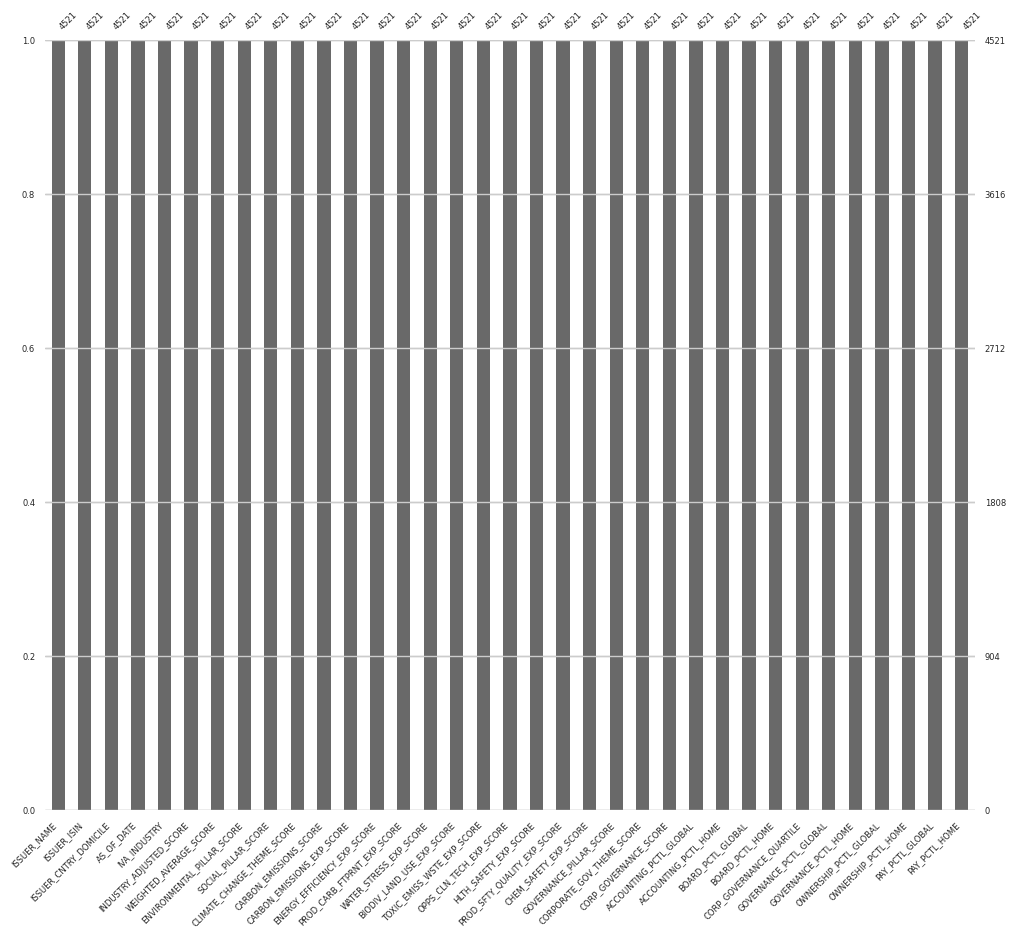

In [197]:
msno.bar(cleaned_subset_df,figsize=(12, 10),fontsize=6)
plt.show()

In [199]:
# Select the relevant columns for PCA (from column 6 to the end)
pca_data = cleaned_subset_df.iloc[:, 5:]  # Since indexing starts from 0, 5 corresponds to column 6
pca_data

,INDUSTRY_ADJUSTED_SCORE,WEIGHTED_AVERAGE_SCORE,ENVIRONMENTAL_PILLAR_SCORE,SOCIAL_PILLAR_SCORE,CLIMATE_CHANGE_THEME_SCORE,CARBON_EMISSIONS_SCORE,CARBON_EMISSIONS_EXP_SCORE,ENERGY_EFFICIENCY_EXP_SCORE,PROD_CARB_FTPRNT_EXP_SCORE,WATER_STRESS_EXP_SCORE,...,ACCOUNTING_PCTL_HOME,BOARD_PCTL_GLOBAL,BOARD_PCTL_HOME,CORP_GOVERNANCE_QUARTILE,GOVERNANCE_PCTL_GLOBAL,GOVERNANCE_PCTL_HOME,OWNERSHIP_PCTL_GLOBAL,OWNERSHIP_PCTL_HOME,PAY_PCTL_GLOBAL,PAY_PCTL_HOME
0,6.2,4.9,5.6,5.6,5.3,10.0,2.0,1.1,7.2,3.5,...,18.0,4.0,5.0,4.0,10.0,6.0,50.0,23.0,69.0,50.0
1,4.5,4.7,6.6,3.7,8.6,10.0,2.2,1.3,5.1,3.5,...,10.0,15.0,14.0,3.0,16.0,10.0,36.0,19.0,69.0,50.0
2,6.2,4.9,5.6,5.6,5.3,10.0,2.0,1.1,7.2,3.5,...,12.0,13.0,13.0,3.0,10.0,8.0,12.0,3.0,61.0,67.0
3,4.5,4.6,6.6,3.3,8.6,10.0,2.2,1.3,5.1,3.5,...,9.0,26.0,24.0,3.0,16.0,12.0,17.0,4.0,45.0,41.0
4,6.3,4.6,5.3,4.6,5.3,5.3,3.7,2.2,3.1,5.6,...,22.0,71.0,29.0,1.0,86.0,34.0,78.0,40.0,85.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,5.3,6.0,4.5,7.8,3.6,3.6,6.7,3.7,5.7,4.3,...,55.0,94.0,79.0,1.0,96.0,75.0,79.0,41.0,64.0,56.0
4517,7.3,6.0,7.4,5.0,7.7,7.9,3.0,2.6,2.8,4.5,...,95.0,55.0,21.0,1.0,92.0,57.0,90.0,45.0,95.0,92.0
4518,4.7,5.7,5.2,6.4,6.2,6.2,2.8,1.3,4.4,3.7,...,75.0,53.0,18.0,2.0,75.0,19.0,99.0,98.0,36.0,11.0
4519,3.9,4.5,2.2,7.8,2.9,2.9,7.3,9.3,3.6,6.0,...,100.0,52.0,18.0,1.0,92.0,56.0,100.0,100.0,92.0,77.0


## Step 3: Perfrom PCA Analysis

In [244]:
# Standardize the data
#scaler = StandardScaler()
scaler = RobustScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

In [246]:
# Perform PCA
pca = PCA()
pca.fit(pca_data_scaled)

# Calculate Explained Variance
explained_variance = pca.explained_variance_ratio_ * 100
cumulative_variance = explained_variance.cumsum()


### Create the Bar Plot for Explained Variance

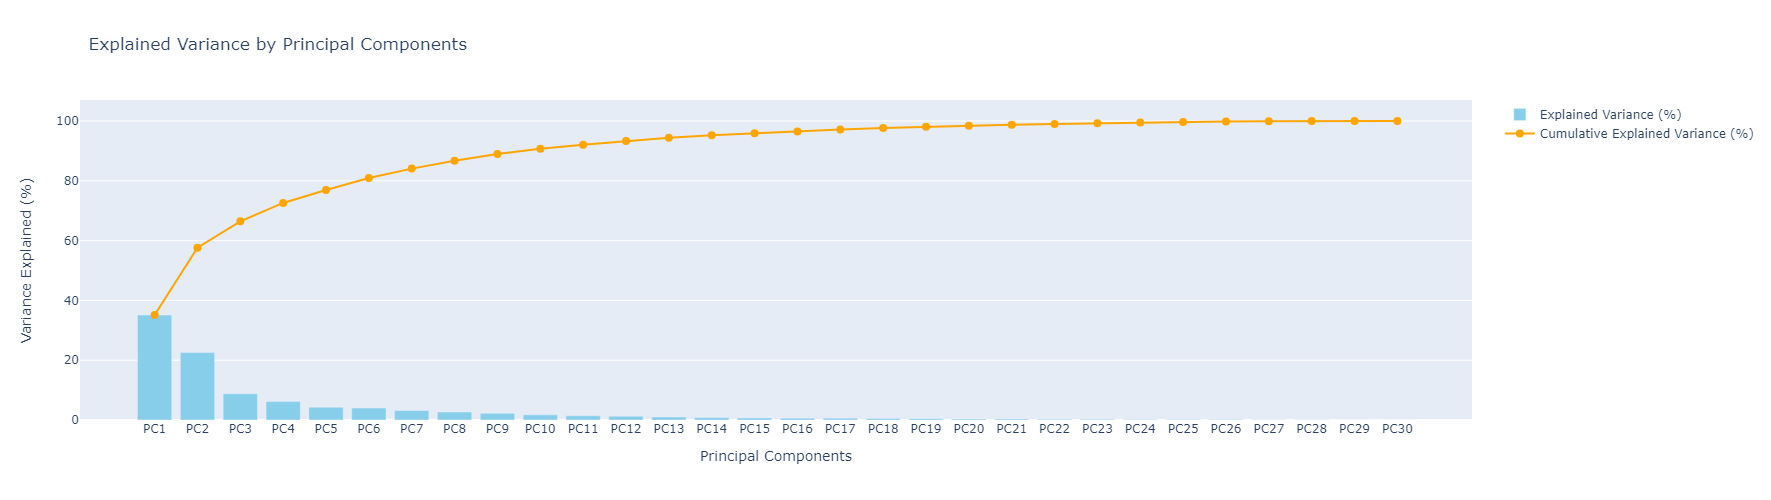

In [249]:
bar_trace = go.Bar(
    x=[f'PC{i+1}' for i in range(len(explained_variance))],  # PC1, PC2, PC3, etc.
    y=explained_variance,
    name='Explained Variance (%)',
    marker=dict(color='skyblue')
)

# Create the Line Plot for Cumulative Explained Variance
line_trace = go.Scatter(
    x=[f'PC{i+1}' for i in range(len(cumulative_variance))],
    y=cumulative_variance,
    name='Cumulative Explained Variance (%)',
    mode='lines+markers',
    line=dict(color='orange'),
    marker=dict(size=8)
)

# Combine the Bar and Line Plots
layout = go.Layout(
    title='Explained Variance by Principal Components',
    xaxis=dict(title='Principal Components'),
    yaxis=dict(title='Variance Explained (%)'),
    barmode='group',
    width=1400,
    height=500
)

# Create the figure
fig = go.Figure(data=[bar_trace, line_trace], layout=layout)
# Show the plot
fig.show()

In [251]:
pca_result_full = pca.fit_transform(pca_data_scaled)

# Create column names for each principal component
column_names = [f'PC{i+1}' for i in range(pca_result_full.shape[1])]

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result_full, columns=column_names)

### Create a biplot

The vectors represent the original features projected into the PCA space, helping to interpret the components.

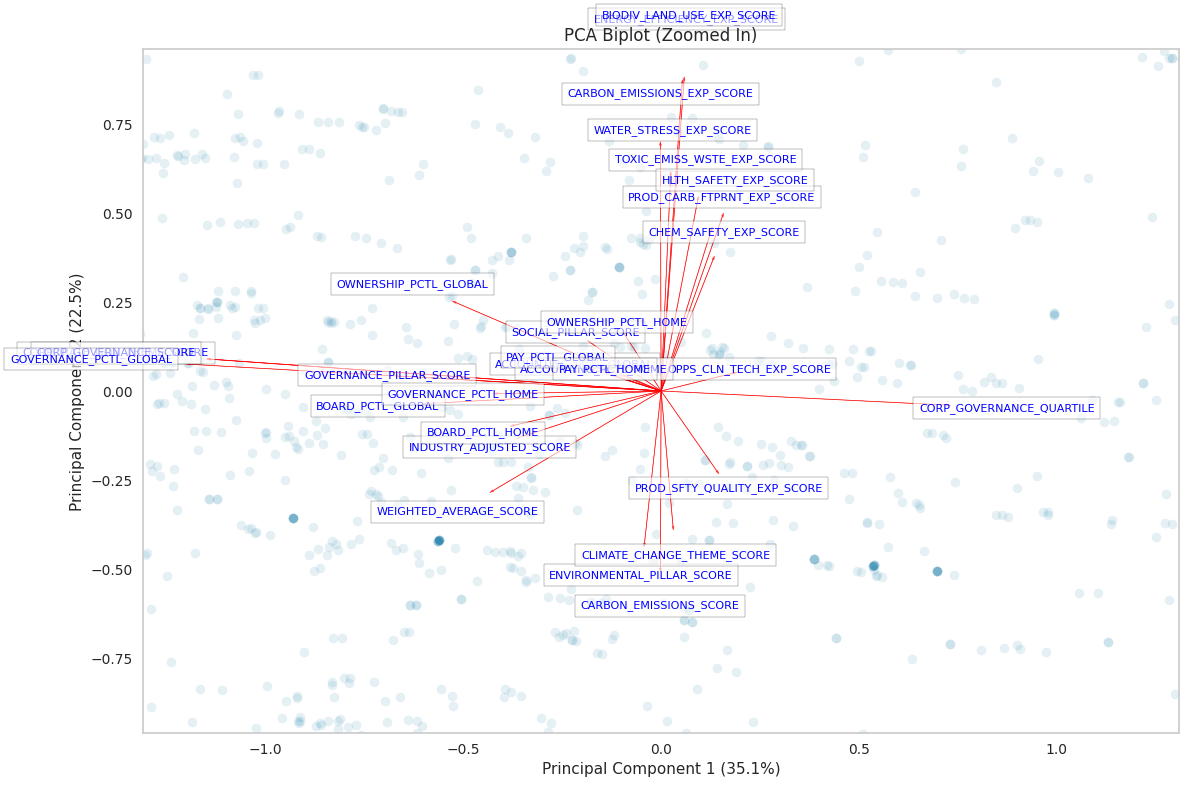

In [275]:
# Plot the biplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.1)

# Add component vectors (biplot)
loadings = pca.components_.T[:, :2] * np.sqrt(pca.explained_variance_[:2])

# Calculate the limits based on the biplot vectors
factor =1.1
x_limits = [min(loadings[:, 0]) * factor, max(loadings[:, 0]) * factor]
y_limits = [min(loadings[:, 1]) * factor, max(loadings[:, 1]) * factor]

# Ensure that limits are properly adjusted to account for both positive and negative extremes
x_min = min(x_limits[0], -max(loadings[:, 0]) * factor)
x_max = max(x_limits[1], -min(loadings[:, 0]) * factor)
y_min = min(y_limits[0], -max(loadings[:, 1]) * factor)
y_max = max(y_limits[1], -min(loadings[:, 1]) * factor)

# Plot the biplot vectors
for i, varname in enumerate(pca_data.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=0.8, head_width=0.005, head_length=0.01)
    plt.text(loadings[i, 0] * factor*1.1, loadings[i, 1] * factor*1.1, varname, color='blue', ha='center', va='center',
             fontsize=8, bbox=dict(facecolor='white', alpha=0.6))

# Set the limits for x and y axes based on the biplot vectors
#plt.xlim(x_limits)
#plt.ylim(y_limits)
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])

plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA Biplot (Zoomed In)')
plt.grid()

# Adjusting the layout to reduce label overlap
plt.tight_layout()

plt.show()

Explanation:
1. Standardization: Before applying PCA, the data is standardized using StandardScaler to ensure each feature contributes equally to the analysis.
2. PCA: PCA is performed using PCA from sklearn.decomposition, reducing the dataset to two principal components for easy visualization.
3. Biplot:
    - The biplot displays the PCA result with data points (scatter plot) and the directions of the original features (arrows).
    - The arrows represent the direction and magnitude of the features in the reduced PCA space, indicating how each feature contributes to the principal components.
4. Plot: The scatter plot (sns.scatterplot) shows the scores of the samples in the new PCA space, while the arrows indicate the loadings (contributions of the original features).


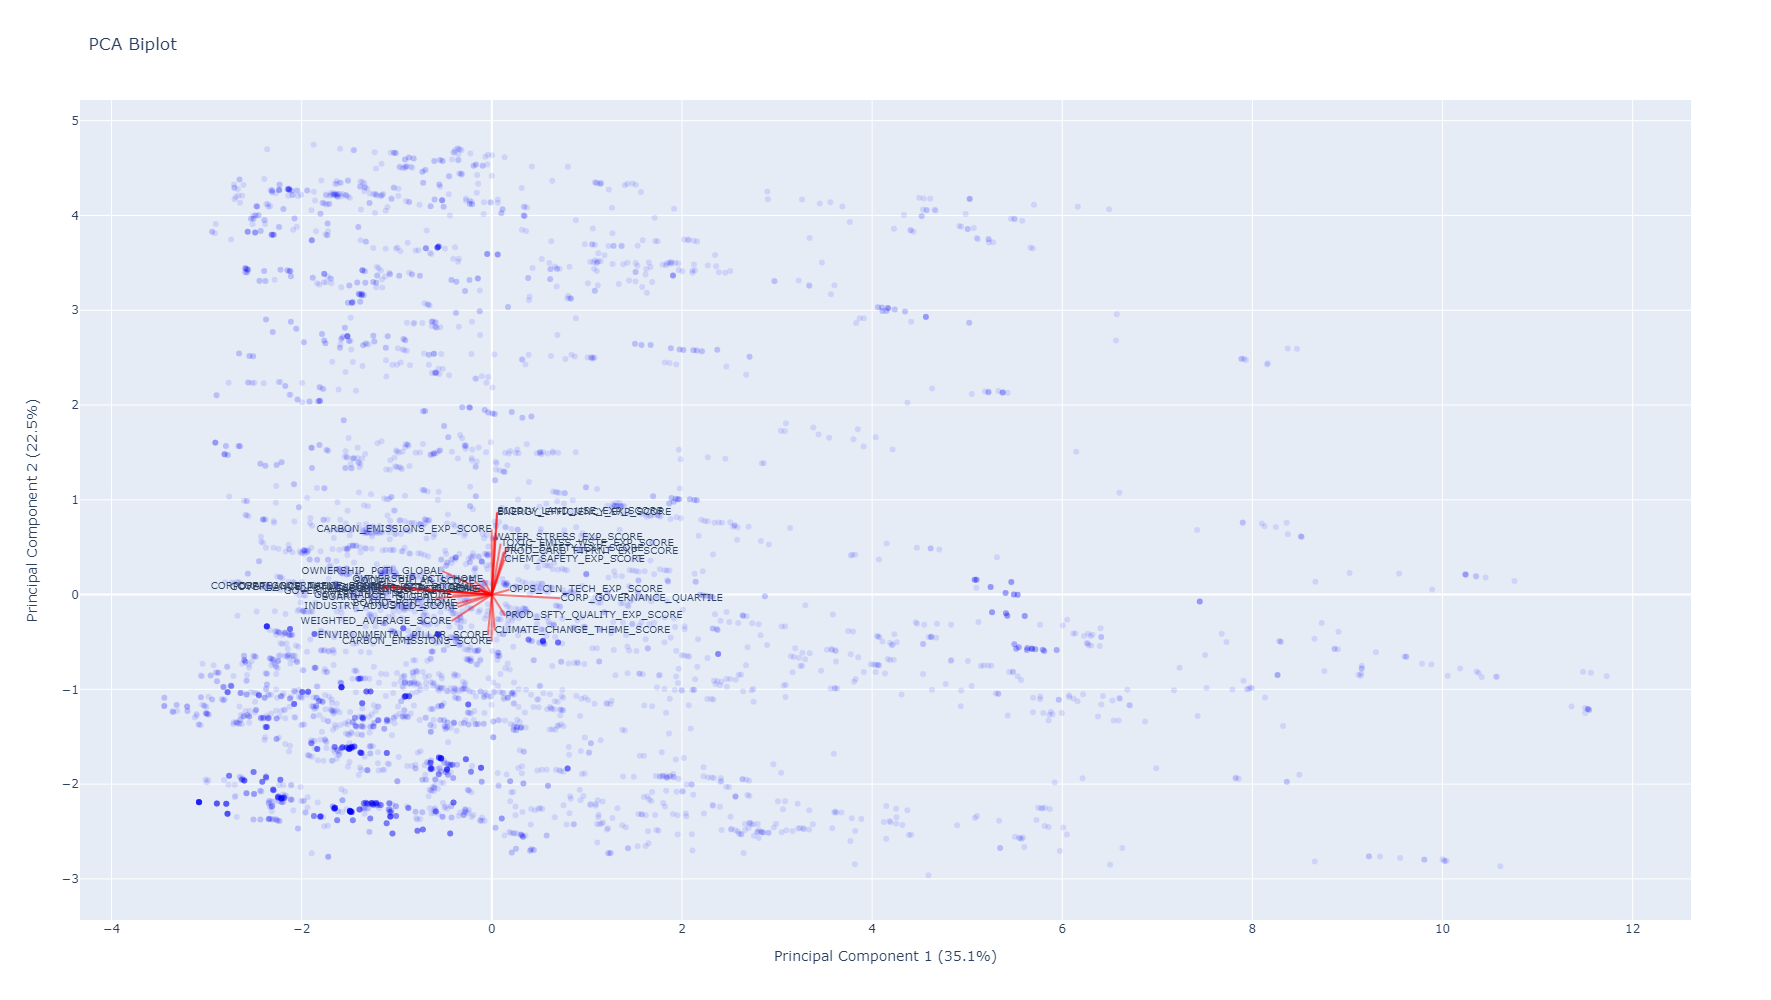

In [279]:
# Step 6: Create the scatter plot for the PCA results
scatter = go.Scatter(
    x=pca_df['PC1'], 
    y=pca_df['PC2'],
    mode='markers',
    marker=dict(color='rgba(0,0,255,0.1)'),  # High transparency
    text=pca_data.index,  # Optional: add the index as hover text
    hoverinfo='text'
)

# Step 7: Create the biplot vectors with text at the tips
vectors = []
for i, varname in enumerate(pca_data.columns):
    vectors.append(go.Scatter(
        x=[0, loadings[i, 0]],
        y=[0, loadings[i, 1]],
        mode='lines',
        line=dict(color='rgba(255, 0, 0, 0.5)', width=2),
        showlegend=True,
        hoverinfo='text',
        text=[varname],  # Hover text displays the variable name along the vector
    ))
    
    # Add labels at the tip of the vectors
    vectors.append(go.Scatter(
        x=[loadings[i, 0]],
        y=[loadings[i, 1]],
        mode='text',
        text=[varname],
        textposition='middle right' if loadings[i, 0] > 0 else 'middle left',
        textfont=dict(size=10),  # Reduced font size for labels
        showlegend=False
    ))

# Step 8: Combine the plots and set axis limits
layout = go.Layout(
    title='PCA Biplot',
    xaxis=dict(title=f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)'),
    yaxis=dict(title=f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)'),
    showlegend=False,
    width=1200,
    height=1000,
)

# Combine scatter and vectors
fig = go.Figure(data=[scatter] + vectors, layout=layout)

# Show the plot
fig.show()